In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
series = read_csv('water.csv', header=0, index_col=0, parse_dates=True)

In [3]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


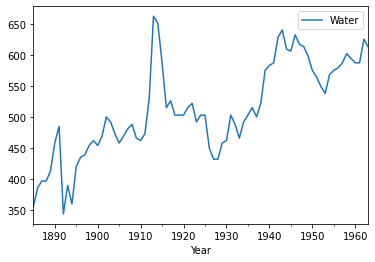

In [4]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

In [5]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 69, Validation 10


#### Persistence/ Base model

In [6]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

C:\Users\Dell\AppData\Local\Temp\ipykernel_26148\3526950642.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


In [7]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Observed =%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=575.000, Observed =583.000
>Predicted=583.000, Observed =587.000
>Predicted=587.000, Observed =628.000
>Predicted=628.000, Observed =640.000
>Predicted=640.000, Observed =609.000
>Predicted=609.000, Observed =606.000
>Predicted=606.000, Observed =632.000
>Predicted=632.000, Observed =617.000
>Predicted=617.000, Observed =613.000
>Predicted=613.000, Observed =598.000
>Predicted=598.000, Observed =575.000
>Predicted=575.000, Observed =564.000
>Predicted=564.000, Observed =549.000
>Predicted=549.000, Observed =538.000
RMSE: 18.923


#### ARIMA Hyperparameters

In [8]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [9]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [10]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26148\740398515.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


ARIMA(0, 0, 0) RMSE=111.637
ARIMA(0, 0, 1) RMSE=65.751
ARIMA(0, 0, 2) RMSE=46.375
ARIMA(0, 0, 3) RMSE=39.778
ARIMA(0, 0, 4) RMSE=35.618
ARIMA(0, 1, 0) RMSE=18.923
ARIMA(0, 1, 1) RMSE=18.721
ARIMA(0, 1, 2) RMSE=19.566
ARIMA(0, 1, 3) RMSE=24.243
ARIMA(0, 1, 4) RMSE=24.500
ARIMA(0, 2, 0) RMSE=26.576
ARIMA(0, 2, 1) RMSE=19.830
ARIMA(0, 2, 2) RMSE=19.565
ARIMA(0, 2, 3) RMSE=20.109
ARIMA(0, 2, 4) RMSE=24.531
ARIMA(1, 0, 0) RMSE=22.975
ARIMA(1, 0, 1) RMSE=23.351
ARIMA(1, 0, 2) RMSE=25.254
ARIMA(1, 0, 3) RMSE=25.245
ARIMA(1, 0, 4) RMSE=25.261
ARIMA(1, 1, 0) RMSE=18.759
ARIMA(1, 1, 1) RMSE=18.685
ARIMA(1, 1, 2) RMSE=22.054
ARIMA(1, 1, 3) RMSE=24.448
ARIMA(1, 1, 4) RMSE=25.092
ARIMA(1, 2, 0) RMSE=25.332
ARIMA(1, 2, 1) RMSE=19.609
ARIMA(1, 2, 2) RMSE=19.980
ARIMA(1, 2, 3) RMSE=20.569
ARIMA(1, 2, 4) RMSE=23.677
ARIMA(2, 0, 0) RMSE=23.542
ARIMA(2, 0, 1) RMSE=23.529
ARIMA(2, 0, 2) RMSE=25.652
ARIMA(2, 0, 3) RMSE=25.310
ARIMA(2, 0, 4) RMSE=25.876
ARIMA(2, 1, 0) RMSE=18.746
ARIMA(2, 1, 1) RMSE=22.786


#### Build Model based on the optimized values

In [11]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [12]:
# load data
train = read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [13]:
train

,356
1885-01-01,
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
1890-01-01,458
...,...
1949-01-01,598
1950-01-01,575
1951-01-01,564


In [17]:
# fit model
model = ARIMA(train.values, order=(1, 1, 1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(2, 79)
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

#### Combine train and test data and build final model

In [ ]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(0, 2, 2))
model_fit = model.fit()

In [ ]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(2,80)
plt.show()

In [ ]:
forecast